In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
df=pd.read_csv("C:/Users/Harpreet/CompleteDataset.csv")

C:\Users\Harpreet\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()
df.columns

In [17]:
columns_needed = ['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'Preferred Positions']

In [19]:
columns_needed_rearranged = ['Aggression','Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'Heading accuracy', 'Long shots','Penalties', 'Shot power', 'Volleys', 
       'Short passing', 'Long passing',
       'Interceptions', 'Marking', 'Sliding tackle', 'Standing tackle',
       'Strength', 'Vision', 'Acceleration', 'Agility', 
       'Reactions', 'Stamina', 'Balance', 'Ball control','Composure','Jumping', 
       'Sprint speed', 'Positioning','Preferred Positions']

In [20]:
df = df[columns_needed_rearranged]
df.head()

,Aggression,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,Heading accuracy,Long shots,Penalties,Shot power,...,Agility,Reactions,Stamina,Balance,Ball control,Composure,Jumping,Sprint speed,Positioning,Preferred Positions
0,63,85,81,91,94,76,88,92,85,94,...,89,96,92,63,93,95,95,91,95,ST LW
1,48,77,89,97,95,90,71,88,74,85,...,90,95,73,95,95,96,68,87,93,RW
2,56,75,81,96,89,84,62,77,81,80,...,96,88,78,82,95,92,61,90,90,LW
3,78,77,86,86,94,84,77,86,85,87,...,86,93,89,60,91,83,69,77,92,ST
5,80,62,77,85,91,84,85,83,81,88,...,78,91,79,80,89,87,84,83,91,ST


In [12]:
df['Preferred Positions'] = df['Preferred Positions'].str.strip()
df = df[df['Preferred Positions'] != 'GK']
df.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
5,5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0


In [22]:
df.isnull().values.any()

False

In [23]:
p = df['Preferred Positions'].str.split().apply(lambda x: x[0]).unique()
p

array(['ST', 'RW', 'LW', 'CDM', 'CB', 'RM', 'CM', 'LM', 'LB', 'CAM', 'RB',
       'CF', 'RWB', 'LWB'], dtype=object)

In [24]:
df_new = df.copy()
df_new.drop(df_new.index, inplace=True)

for i in p:
    df_temp = df[df['Preferred Positions'].str.contains(i)]
    df_temp['Preferred Positions'] = i
    df_new = df_new.append(df_temp, ignore_index=True)
    
df_new.iloc[::500, :]

C:\Users\Harpreet\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Aggression,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,Heading accuracy,Long shots,Penalties,Shot power,...,Agility,Reactions,Stamina,Balance,Ball control,Composure,Jumping,Sprint speed,Positioning,Preferred Positions
0,63,85,81,91,94,76,88,92,85,94,...,89,96,92,63,93,95,95,91,95,ST
500,69,44,55,66,80-3,54,65,75,75,82,...,68-2,67,86-3,64+4,68,63,69,75-3,70+3,ST
1000,70,62,59,67,68,43,71,63,67,66,...,68,68,74,70,69,67,72,63,75,ST
1500,46,55,41,69,67,41,59,62,61,64,...,67,68,47,71,71,64,73,67,64,ST
2000,32,59,47,67,53,42,40,42,51,50,...,81,58,66,79,65,44,60,84,61,ST
2500,64,62,48,66,61,31,55,52,49,65,...,70,45,74,66,60,48,68,69,58,ST
3000,42,31,36,48,61,27,59,49,53,53,...,58,53,55,56,52,49,78,56,49,ST
3500,66,65,66,75,66,55,59,69,53,79,...,73,68,79,62,74,65,75,91,68,RW
4000,41,59,38,61,57,36,58,52,57,59,...,70,65,72,69,58,49,54,77,60,RW
4500,76,73,57,72,42,59,60,41,35,57,...,82,65,71,83,72,64,70,79,57,LW


In [27]:
cols = [col for col in df_new.columns if col not in ['Preferred Positions']]

for i in cols:
    df_new[i] = df_new[i].apply(lambda x: eval(x) if isinstance(x,str) else x)

df_new.iloc[::500, :]

,Aggression,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,Heading accuracy,Long shots,Penalties,Shot power,...,Agility,Reactions,Stamina,Balance,Ball control,Composure,Jumping,Sprint speed,Positioning,Preferred Positions
0,63,85,81,91,94,76,88,92,85,94,...,89,96,92,63,93,95,95,91,95,ST
500,69,44,55,66,77,54,65,75,75,82,...,66,67,83,68,68,63,69,72,73,ST
1000,70,62,59,67,68,43,71,63,67,66,...,68,68,74,70,69,67,72,63,75,ST
1500,46,55,41,69,67,41,59,62,61,64,...,67,68,47,71,71,64,73,67,64,ST
2000,32,59,47,67,53,42,40,42,51,50,...,81,58,66,79,65,44,60,84,61,ST
2500,64,62,48,66,61,31,55,52,49,65,...,70,45,74,66,60,48,68,69,58,ST
3000,42,31,36,48,61,27,59,49,53,53,...,58,53,55,56,52,49,78,56,49,ST
3500,66,65,66,75,66,55,59,69,53,79,...,73,68,79,62,74,65,75,91,68,RW
4000,41,59,38,61,57,36,58,52,57,59,...,70,65,72,69,58,49,54,77,60,RW
4500,76,73,57,72,42,59,60,41,35,57,...,82,65,71,83,72,64,70,79,57,LW


Text(22,100,'Mixed Attributes')

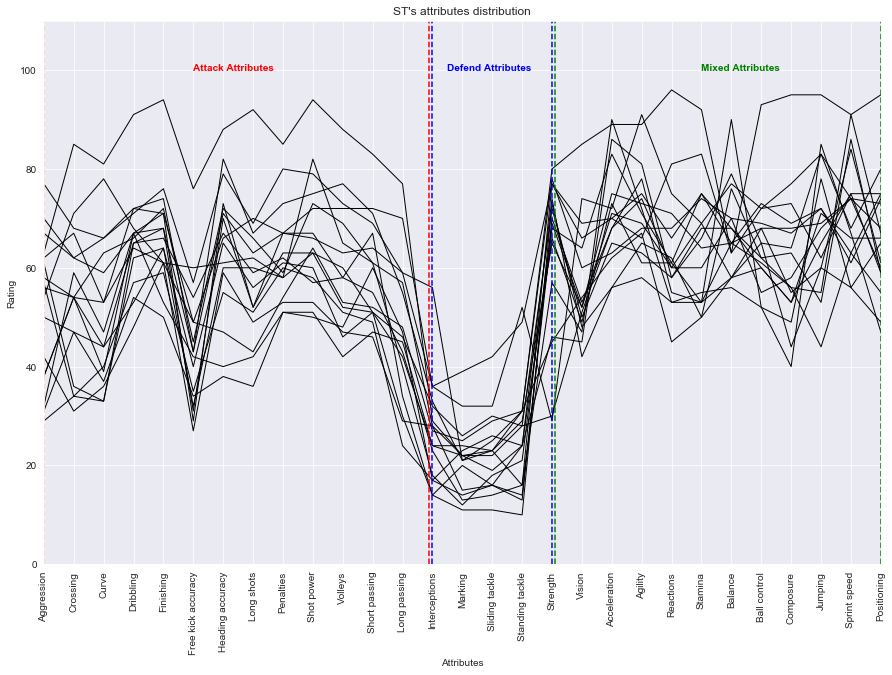

In [30]:
fig, ax = plt.subplots()
df_new_ST = df_new[df_new['Preferred Positions'] == 'ST'].iloc[::200,:-1]
df_new_ST.T.plot.line(color = 'black', figsize = (15,10), legend = False, ylim = (0, 110), title = "ST's attributes distribution", ax=ax)

ax.set_xlabel('Attributes')
ax.set_ylabel('Rating')

ax.set_xticks(np.arange(len(cols)))
ax.set_xticklabels(labels = cols, rotation=90)

for ln in ax.lines:
    ln.set_linewidth(1)

ax.axvline(0, color='red', linestyle='--')   
ax.axvline(12.9, color='red', linestyle='--')

ax.axvline(13, color='blue', linestyle='--')
ax.axvline(17, color='blue', linestyle='--')

ax.axvline(17.1, color='green', linestyle='--')
ax.axvline(28, color='green', linestyle='--')

ax.text(5, 100, 'Attack Attributes', color = 'red', weight = 'bold')
ax.text(13.5, 100, 'Defend Attributes', color = 'blue', weight = 'bold')
ax.text(22, 100, 'Mixed Attributes', color = 'green', weight = 'bold')

Text(22,0.07,'Mixed Attributes')

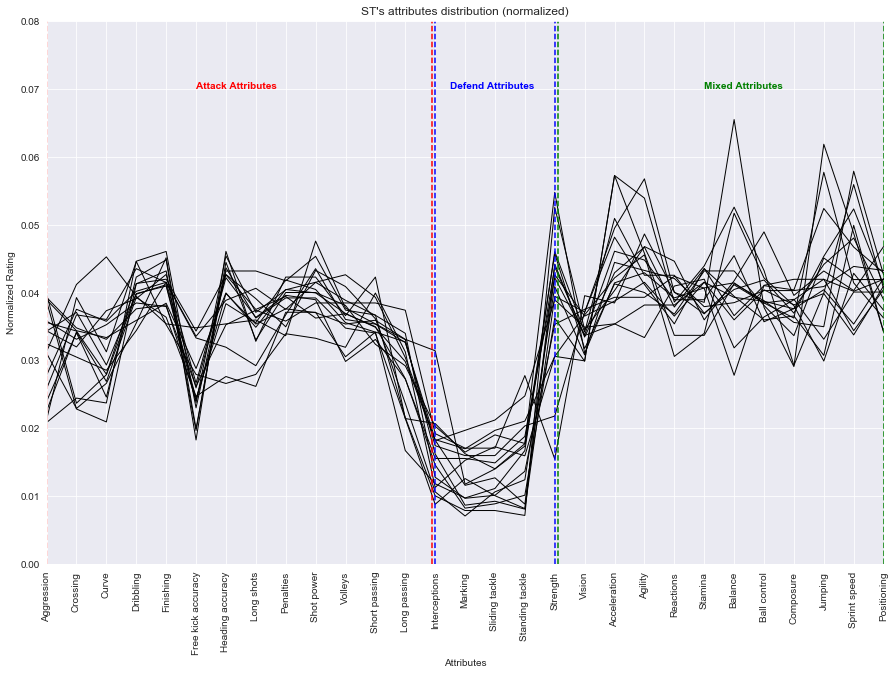

In [29]:
df_new_ST_normalized = df_new_ST.div(df_new_ST.sum(axis=1), axis=0)

fig, ax = plt.subplots()
df_new_ST_normalized.T.plot.line(color = 'black', figsize = (15,10), ylim = (0, 0.08), legend = False, title = "ST's attributes distribution (normalized)", ax=ax)

ax.set_xlabel('Attributes')
ax.set_ylabel('Normalized Rating')

ax.set_xticks(np.arange(len(cols)))
ax.set_xticklabels(labels = cols, rotation=90)

for ln in ax.lines:
    ln.set_linewidth(1)

ax.axvline(0, color='red', linestyle='--')   
ax.axvline(12.9, color='red', linestyle='--')

ax.axvline(13, color='blue', linestyle='--')
ax.axvline(17, color='blue', linestyle='--')

ax.axvline(17.1, color='green', linestyle='--')
ax.axvline(28, color='green', linestyle='--')

ax.text(5, 0.07, 'Attack Attributes', color = 'red', weight = 'bold')
ax.text(13.5, 0.07, 'Defend Attributes', color = 'blue', weight = 'bold')
ax.text(22, 0.07, 'Mixed Attributes', color = 'green', weight = 'bold') 